# Imports

In [2]:
%matplotlib inline

import math, time, random, datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import missingno 
import seaborn as sns
plt.style.use("seaborn-whitegrid")

#Preprocessing the Data
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

#Machine Learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

import warnings

# Loading in the Data

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
gender_submission = pd.read_csv("gender_submission.csv")#Example of what a submission should look like

In [4]:
train.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


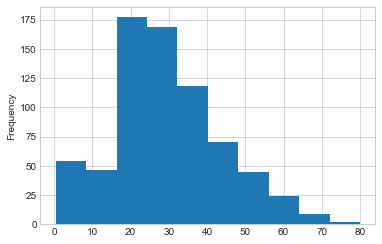

In [5]:
#Visualize the Training Age Data
train.Age.plot.hist()
plt.show()

In [6]:
# View the Test Data(same as Training Data)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
#View the example submission dataframe
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Data Descriptions

In [8]:
#Survival: 0 = No, 1 = YES

In [9]:
#pClass = 1st, 2nd, 3rd

In [10]:
#sex

In [11]:
#Age: Age in Years

In [12]:
#sibsp: number of siblings/spouses aboard the Titanic

#parch: number of parents/children aboard the Titanic

#ticket: Ticket number

#fare: Passenger fare

#cabin: Cabin number

#embarked: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

In [13]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# What missing values are there?

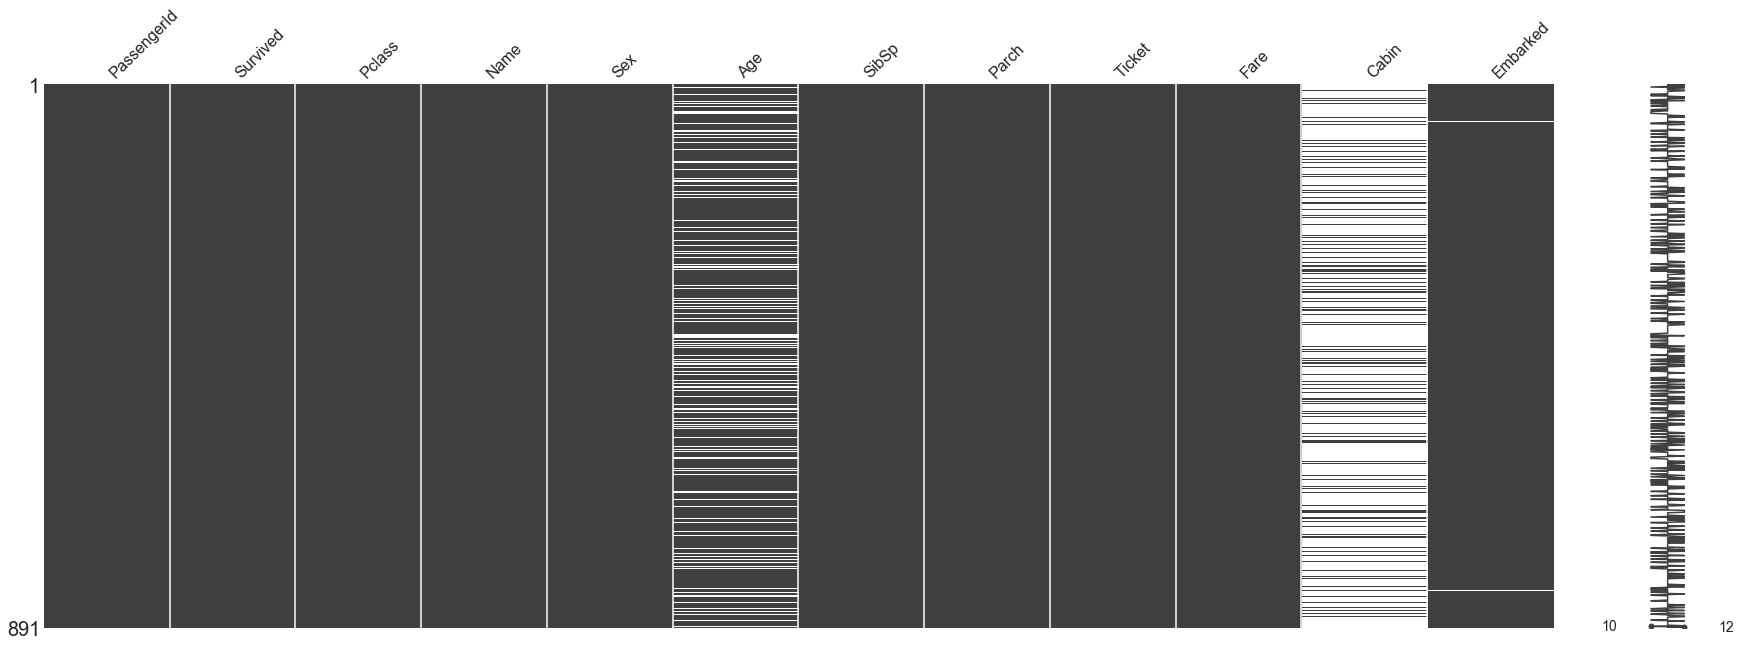

In [14]:
#Plot graphic of missing values
missingno.matrix(train, figsize = (30, 10))

In [15]:
#Alternatively, you can see the number of missing values like this
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# To perform Data Analysis, Create Two DF's

In [16]:
df_bin = pd.DataFrame() #For discretised Continuous Variables
df_con = pd.DataFrame() #For continuous Variables

# Check what datatypes are in a DataFrame

In [17]:
# Different Data Types in the Dataset
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Let's Explore Each of These Features Indv.

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Target Feature: Survived

0 = Did not Survive


1 = Survived

0    549
1    342
Name: Survived, dtype: int64


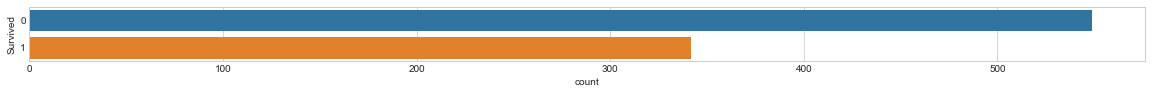

In [19]:
#Check how many people survived?
fig = plt.figure(figsize = (20,1))
sns.countplot(y= 'Survived', data = train)
print(train.Survived.value_counts())

In [20]:
# Add to our Subset Dataframes

df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

In [21]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [22]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


## Feature: Pclass

### Let's Plot the Distribution

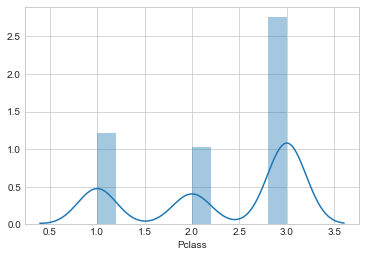

In [23]:
sns.distplot(train.Pclass)

In [24]:
train.Pclass.isnull().sum()

0

In [25]:
df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

### Features: Name

Description: Name of the Passenger

In [26]:
train.Name.value_counts()

Foo, Mr. Choong                                         1
Nysveen, Mr. Johan Hansen                               1
Zabour, Miss. Hileni                                    1
Widener, Mr. Harry Elkins                               1
Goncalves, Mr. Manuel Estanslas                         1
Sage, Master. Thomas Henry                              1
Olsson, Mr. Nils Johan Goransson                        1
Danbom, Mr. Ernst Gilbert                               1
Sinkkonen, Miss. Anna                                   1
Saundercock, Mr. William Henry                          1
Gill, Mr. John William                                  1
Chambers, Mrs. Norman Campbell (Bertha Griggs)          1
Keane, Mr. Andrew "Andy"                                1
Panula, Mr. Jaako Arnold                                1
Rice, Mrs. William (Margaret Norton)                    1
Milling, Mr. Jacob Christian                            1
Van Impe, Mrs. Jean Baptiste (Rosalie Paula Govaert)    1
Vande Walle, M

Because of so many different names and to keep this fast, we won't move forward using the variable NAME

### Feature: Sex

Description: Sex of the Passenger

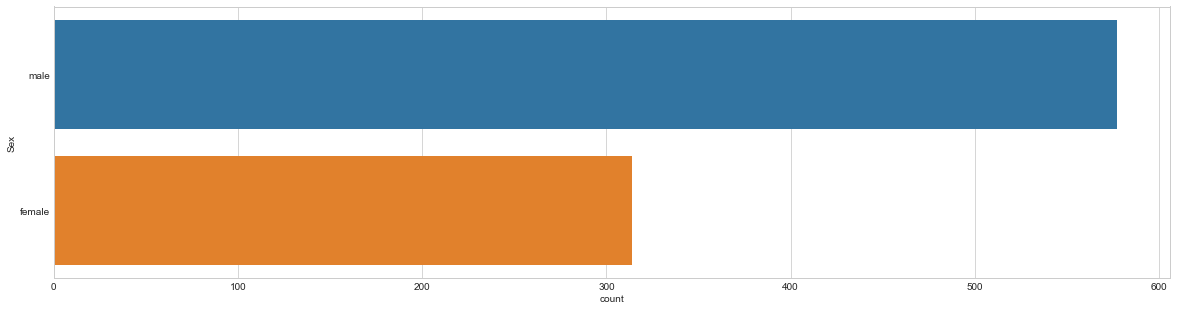

In [27]:
#View Distribution of Sex
plt.figure(figsize=(20, 5))
sns.countplot(y="Sex", data=train)

In [28]:
#Are there any missing columns
train.Sex.isnull().sum()

0

Since this is already a binary val, let's add it to our subset dataframes

In [29]:
train.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [30]:
#Add sex to the subset dataframes
df_bin['Sex'] = train['Sex']

#Change sex to 0 and 1 for female
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female', 1, 0)

df_con['Sex']  = train['Sex']

In [31]:
df_bin.head()

,Survived,Pclass,Sex
0,0,3,0
1,1,1,1
2,1,3,1
3,1,1,1
4,0,3,0


In [32]:
df_con.head()

,Survived,Pclass,Sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male


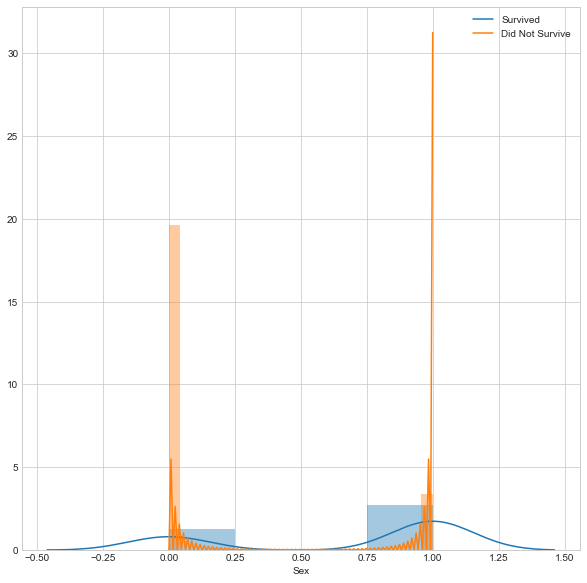

In [33]:
#How does Sex compare to survival
#We know how gender affected survival, now time to visualize

fig = plt.figure(figsize=(10,10))
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'})
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], kde_kws={'label': 'Did Not Survive'})

As asserted, more females survive compared to Males

### Feature: Age

Description: Age of Passenger

In [34]:
#Check Missing Values

In [35]:
train.Age.isnull().sum()

177

In [36]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});

### Feature: SibSp

SibSp == Siblings and Spouses the Passenger has Aboard the Titanic

In [37]:
train.SibSp.isnull().sum()

0

In [38]:
#What values are there?
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [39]:
# Add SibSp to subset dataframes
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

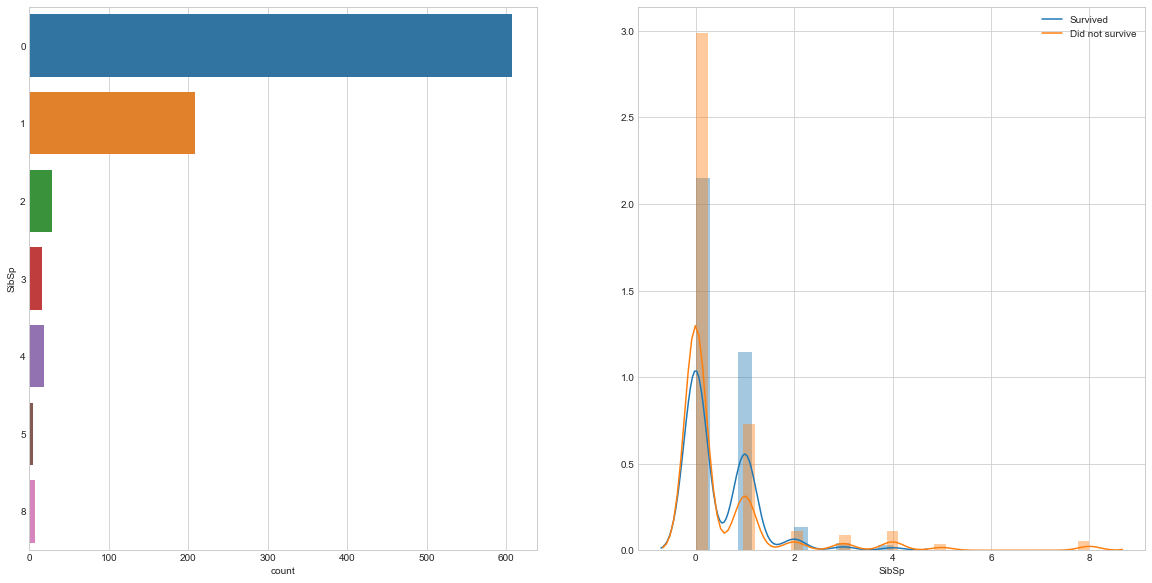

In [40]:
# Visualize the counts of SibSp and the Distribtuion of the VAlues
#Against Survived
plot_count_dist(train, bin_df=df_bin, label_column = 'Survived', target_column='SibSp',figsize=(20,10))

### Feature: Parch

In [41]:
train.Parch.isnull().sum()

0

In [42]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [43]:
#Add Parch to the Subset Dataframes
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

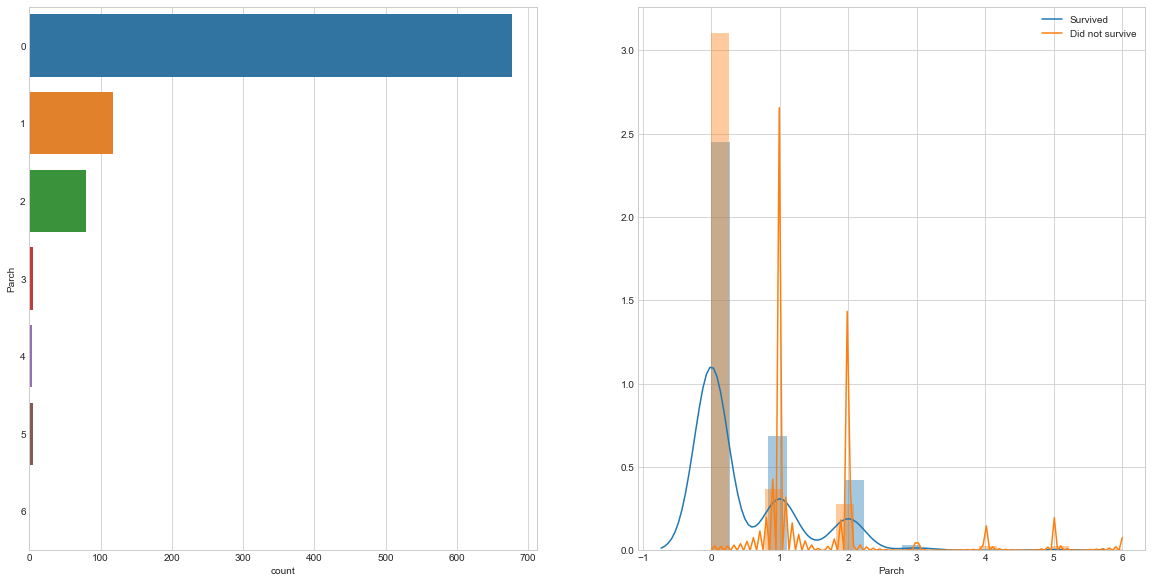

In [44]:
# Visualize the Counts of Parch 
# Against Survival

plot_count_dist(train, 
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Parch', 
                figsize=(20, 10))

In [45]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch
0,0,3,male,1,0
1,1,1,female,1,0
2,1,3,female,0,0
3,1,1,female,1,0
4,0,3,male,0,0


### Feature: Ticket

In [47]:
train.Ticket.isnull().sum()

0

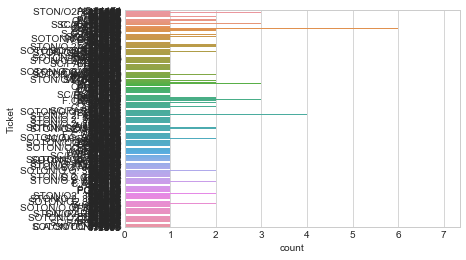

In [48]:
sns.countplot(y="Ticket", data=train)

In [49]:
train.Ticket.value_counts()

CA. 2343              7
347082                7
1601                  7
3101295               6
CA 2144               6
347088                6
S.O.C. 14879          5
382652                5
19950                 4
PC 17757              4
17421                 4
113760                4
349909                4
LINE                  4
347077                4
4133                  4
113781                4
W./C. 6608            4
2666                  4
110413                3
F.C.C. 13529          3
363291                3
29106                 3
C.A. 34651            3
230080                3
347742                3
C.A. 31921            3
PC 17582              3
248727                3
35273                 3
                     ..
350404                1
2690                  1
W.E.P. 5734           1
2624                  1
3101267               1
367232                1
2663                  1
SOTON/O.Q. 3101312    1
368703                1
SOTON/O.Q. 3101306    1
2647            

In [50]:
#How many unique tickets are there

print("There are {} unique Ticket Values".format(len(train.Ticket.unique())))

There are 681 unique Ticket Values


In [51]:
#Currently to many tickets, so we dont need to include it in the df rn

### Feature: Fare

In [52]:
train.Fare.isnull().sum()

0

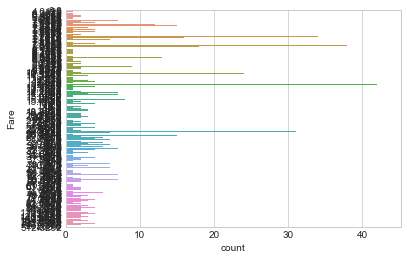

In [53]:
sns.countplot(y="Fare", data = train)

In [54]:
train.Fare.dtype

dtype('float64')

In [55]:
#How many unique kinds of Fare are there?
print("There are {} unique Fare values.".format(len(train.Fare.unique())))

There are 248 unique Fare values.


In [56]:
#Can directly add it to the Continous DF
#We need oto add it to the categorical DF, we split it into Ddiscretised Data Frames

#Add fare to sub dataframes
df_con['Fare'] = train['Fare']
df_bin['Fare'] = pd.cut(train['Fare'], bins = 5)

In [57]:
df_bin.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

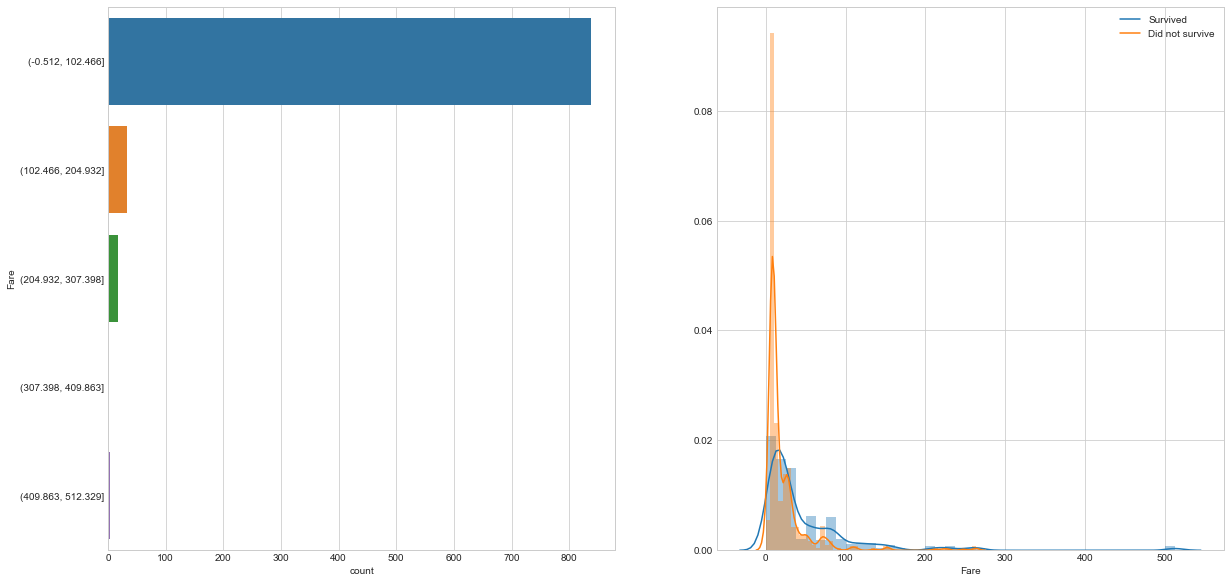

In [58]:
# Visualise the Fare bin counts as well as the Fare distribution versus Survived.
plot_count_dist(data=train,
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Fare', 
                figsize=(20,10), 
                use_bin_df=True)

### Feature: Cabin

In [59]:
train.Cabin.isnull().sum()

687

In [60]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
train.Cabin.value_counts()

B96 B98            4
G6                 4
C23 C25 C27        4
C22 C26            3
F2                 3
D                  3
F33                3
E101               3
B5                 2
C124               2
B35                2
D33                2
F4                 2
D17                2
B58 B60            2
C83                2
E121               2
E44                2
C126               2
C68                2
B28                2
C52                2
B22                2
B49                2
B18                2
B57 B59 B63 B66    2
D35                2
C93                2
D26                2
D20                2
                  ..
A36                1
C95                1
D28                1
C87                1
E17                1
C111               1
A26                1
C45                1
C106               1
C85                1
B4                 1
C104               1
C46                1
C62 C64            1
E10                1
A7                 1
A31          

### Feature: Embarked

In [62]:
train.Embarked.isnull().sum()

2

In [63]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

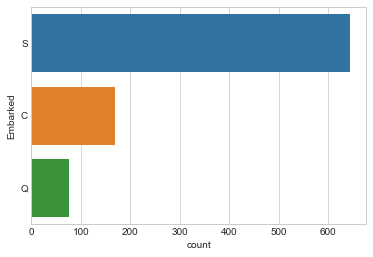

In [64]:
sns.countplot(y="Embarked", data=train)

In [65]:
#Add Embarked to sub DataFrames
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

In [66]:
#Remove Embakred Rows which are missing values
print(len(df_con))
df_con = df_con.dropna(subset=['Embarked'])
df_bin = df_bin.dropna(subset=['Embarked'])

print(len(df_con))

891
889


## Feature Encoding

In [67]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,"(-0.512, 102.466]",S
1,1,1,1,1,0,"(-0.512, 102.466]",C
2,1,3,1,0,0,"(-0.512, 102.466]",S
3,1,1,1,1,0,"(-0.512, 102.466]",S
4,0,3,0,0,0,"(-0.512, 102.466]",S


In [68]:
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)

df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [69]:
df_con.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S
5,0,3,male,0,0,8.4583,Q
6,0,1,male,0,0,51.8625,S
7,0,3,male,3,1,21.0750,S
8,1,3,female,0,2,11.1333,S
9,1,2,female,1,0,30.0708,C


In [70]:
# One Hot Encode the Categorical Columns

df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_con['Sex'], prefix='sex')

df_pclass_one_hot = pd.get_dummies(df_con['Pclass'], prefix='pclass')

In [71]:
#Combine one-hot encoded columns with df_con_enc
df_con_enc = pd.concat([df_con, 
                        df_embarked_one_hot, 
                        df_sex_one_hot, 
                        df_pclass_one_hot], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
df_con_enc = df_con_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [72]:
df_con_enc.head()

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1


## Start Building Machine Learning Models

In [73]:
selected_df = df_con_enc

In [74]:
selected_df.head()

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1


In [75]:
X_train = selected_df.drop('Survived', axis=1)
y_train = selected_df.Survived

In [76]:
X_train.shape

(889, 11)

In [77]:
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [78]:
y_train.shape

(889,)

### Define a Function to Fit Machine Learning Algorithms

In [79]:
# Function that runs the requested algorthm and return sthe accuracy metrics

def fit_ml_algo(algo, X_train, y_train, cv):
    
    #One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    train_pred = model_selection.cross_val_predict(algo, X_train, y_train, cv=cv, n_jobs = -1)
    
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

## Logistic Regression

Description:



In [80]:
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

C:\Users\karth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 79.98
Accuracy CV 10-Fold: 79.42
Running Time: 0:00:05.183905


## K-Nearest Neighbors

Description: Finds distances between each query

In [114]:
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 83.46
Accuracy CV 10-Fold: 76.72
Running Time: 0:00:00.074286


## Naive Bayes

In [110]:
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 78.52
Accuracy CV 10-Fold: 77.95
Running Time: 0:00:00.038897


## Linear Support Vector Machines(SVC)

In [115]:
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

C:\Users\karth\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy: 79.3
Accuracy CV 10-Fold: 76.15
Running Time: 0:00:03.553851


## Gradient Descent

In [111]:
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 79.19
Accuracy CV 10-Fold: 69.4
Running Time: 0:00:00.047871


## Decision Trees

In [1]:
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

NameError: name 'time' is not defined

## Gradient Boost Trees

In [113]:
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 86.61
Accuracy CV 10-Fold: 80.65
Running Time: 0:00:00.270273


## CatBoost Algorithm

CatBoost--> Algorithm which gradient boosts Decision Trees library

Good Algorithm to deal with Tabular Data

In [117]:
# View the data for the CatBoost Model
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [118]:
#View labels for CatBoost Model
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [119]:
#Define the categorical features for the CatBoost Model
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

Shows that all variables can be treated as categorical

In [121]:
train_pool = Pool(X_train, y_train, cat_features)

In [122]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [123]:
catboost_model = CatBoostClassifier(iterations=1000, custom_loss=['Accuracy'],loss_function='Logloss')

catboost_model.fit(train_pool, plot=True)

acc_catboost = round(catboost_model.score(X_train, y_train)*100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.009797
0:	learn: 0.6862815	total: 109ms	remaining: 1m 48s
1:	learn: 0.6805312	total: 137ms	remaining: 1m 8s
2:	learn: 0.6754511	total: 162ms	remaining: 53.8s
3:	learn: 0.6701788	total: 171ms	remaining: 42.6s
4:	learn: 0.6637345	total: 180ms	remaining: 35.7s
5:	learn: 0.6581394	total: 220ms	remaining: 36.4s
6:	learn: 0.6526556	total: 229ms	remaining: 32.5s
7:	learn: 0.6479082	total: 238ms	remaining: 29.5s
8:	learn: 0.6427085	total: 255ms	remaining: 28.1s
9:	learn: 0.6382168	total: 270ms	remaining: 26.7s
10:	learn: 0.6332966	total: 292ms	remaining: 26.2s
11:	learn: 0.6282506	total: 308ms	remaining: 25.4s
12:	learn: 0.6238192	total: 319ms	remaining: 24.2s
13:	learn: 0.6185886	total: 352ms	remaining: 24.8s
14:	learn: 0.6137951	total: 370ms	remaining: 24.3s
15:	learn: 0.6094962	total: 389ms	remaining: 23.9s
16:	learn: 0.6058953	total: 417ms	remaining: 24.1s
17:	learn: 0.6015731	total: 439ms	remaining: 24s
18:	learn: 0.5980258	total: 441ms	remaining: 22.8s
19:	learn: 0

170:	learn: 0.4221917	total: 2.25s	remaining: 10.9s
171:	learn: 0.4219639	total: 2.28s	remaining: 11s
172:	learn: 0.4216207	total: 2.28s	remaining: 10.9s
173:	learn: 0.4214106	total: 2.3s	remaining: 10.9s
174:	learn: 0.4212341	total: 2.31s	remaining: 10.9s
175:	learn: 0.4209176	total: 2.33s	remaining: 10.9s
176:	learn: 0.4206829	total: 2.35s	remaining: 10.9s
177:	learn: 0.4203984	total: 2.35s	remaining: 10.9s
178:	learn: 0.4201570	total: 2.36s	remaining: 10.8s
179:	learn: 0.4199177	total: 2.38s	remaining: 10.8s
180:	learn: 0.4195317	total: 2.38s	remaining: 10.8s
181:	learn: 0.4190664	total: 2.38s	remaining: 10.7s
182:	learn: 0.4189418	total: 2.38s	remaining: 10.6s
183:	learn: 0.4185011	total: 2.4s	remaining: 10.7s
184:	learn: 0.4180750	total: 2.41s	remaining: 10.6s
185:	learn: 0.4178133	total: 2.42s	remaining: 10.6s
186:	learn: 0.4171578	total: 2.45s	remaining: 10.6s
187:	learn: 0.4166876	total: 2.46s	remaining: 10.6s
188:	learn: 0.4160703	total: 2.48s	remaining: 10.7s
189:	learn: 0.41

340:	learn: 0.3907420	total: 4s	remaining: 7.72s
341:	learn: 0.3905411	total: 4.01s	remaining: 7.71s
342:	learn: 0.3903294	total: 4.03s	remaining: 7.71s
343:	learn: 0.3902483	total: 4.04s	remaining: 7.7s
344:	learn: 0.3901364	total: 4.05s	remaining: 7.7s
345:	learn: 0.3900281	total: 4.06s	remaining: 7.67s
346:	learn: 0.3898956	total: 4.08s	remaining: 7.67s
347:	learn: 0.3898286	total: 4.09s	remaining: 7.66s
348:	learn: 0.3897229	total: 4.09s	remaining: 7.63s
349:	learn: 0.3896199	total: 4.11s	remaining: 7.63s
350:	learn: 0.3894690	total: 4.12s	remaining: 7.61s
351:	learn: 0.3894434	total: 4.13s	remaining: 7.6s
352:	learn: 0.3893351	total: 4.14s	remaining: 7.59s
353:	learn: 0.3892684	total: 4.15s	remaining: 7.57s
354:	learn: 0.3891348	total: 4.16s	remaining: 7.56s
355:	learn: 0.3891328	total: 4.16s	remaining: 7.53s
356:	learn: 0.3890519	total: 4.2s	remaining: 7.56s
357:	learn: 0.3890125	total: 4.2s	remaining: 7.53s
358:	learn: 0.3889202	total: 4.2s	remaining: 7.5s
359:	learn: 0.3887970	

511:	learn: 0.3754153	total: 5.51s	remaining: 5.25s
512:	learn: 0.3753776	total: 5.52s	remaining: 5.24s
513:	learn: 0.3753770	total: 5.52s	remaining: 5.22s
514:	learn: 0.3753012	total: 5.53s	remaining: 5.21s
515:	learn: 0.3752262	total: 5.54s	remaining: 5.19s
516:	learn: 0.3751696	total: 5.54s	remaining: 5.18s
517:	learn: 0.3749447	total: 5.55s	remaining: 5.16s
518:	learn: 0.3747945	total: 5.57s	remaining: 5.16s
519:	learn: 0.3747292	total: 5.57s	remaining: 5.14s
520:	learn: 0.3746371	total: 5.58s	remaining: 5.13s
521:	learn: 0.3746366	total: 5.58s	remaining: 5.11s
522:	learn: 0.3745833	total: 5.58s	remaining: 5.09s
523:	learn: 0.3744399	total: 5.59s	remaining: 5.08s
524:	learn: 0.3743563	total: 5.61s	remaining: 5.07s
525:	learn: 0.3743257	total: 5.62s	remaining: 5.06s
526:	learn: 0.3742855	total: 5.62s	remaining: 5.04s
527:	learn: 0.3742353	total: 5.62s	remaining: 5.02s
528:	learn: 0.3741372	total: 5.62s	remaining: 5.01s
529:	learn: 0.3740321	total: 5.64s	remaining: 5s
530:	learn: 0.3

675:	learn: 0.3634171	total: 7.1s	remaining: 3.4s
676:	learn: 0.3633957	total: 7.1s	remaining: 3.39s
677:	learn: 0.3633823	total: 7.1s	remaining: 3.37s
678:	learn: 0.3633813	total: 7.1s	remaining: 3.36s
679:	learn: 0.3633244	total: 7.12s	remaining: 3.35s
680:	learn: 0.3632898	total: 7.12s	remaining: 3.33s
681:	learn: 0.3632617	total: 7.12s	remaining: 3.32s
682:	learn: 0.3632141	total: 7.12s	remaining: 3.31s
683:	learn: 0.3631930	total: 7.13s	remaining: 3.3s
684:	learn: 0.3631033	total: 7.14s	remaining: 3.28s
685:	learn: 0.3630875	total: 7.14s	remaining: 3.27s
686:	learn: 0.3630336	total: 7.14s	remaining: 3.25s
687:	learn: 0.3628883	total: 7.16s	remaining: 3.25s
688:	learn: 0.3627565	total: 7.19s	remaining: 3.25s
689:	learn: 0.3626943	total: 7.21s	remaining: 3.24s
690:	learn: 0.3624520	total: 7.25s	remaining: 3.24s
691:	learn: 0.3622957	total: 7.28s	remaining: 3.24s
692:	learn: 0.3622157	total: 7.29s	remaining: 3.23s
693:	learn: 0.3621522	total: 7.29s	remaining: 3.21s
694:	learn: 0.3621

843:	learn: 0.3509699	total: 9.32s	remaining: 1.72s
844:	learn: 0.3508274	total: 9.35s	remaining: 1.71s
845:	learn: 0.3508199	total: 9.35s	remaining: 1.7s
846:	learn: 0.3507341	total: 9.37s	remaining: 1.69s
847:	learn: 0.3507121	total: 9.38s	remaining: 1.68s
848:	learn: 0.3505986	total: 9.41s	remaining: 1.67s
849:	learn: 0.3505388	total: 9.43s	remaining: 1.66s
850:	learn: 0.3505383	total: 9.44s	remaining: 1.65s
851:	learn: 0.3505213	total: 9.45s	remaining: 1.64s
852:	learn: 0.3505159	total: 9.45s	remaining: 1.63s
853:	learn: 0.3505060	total: 9.45s	remaining: 1.62s
854:	learn: 0.3503364	total: 9.46s	remaining: 1.6s
855:	learn: 0.3502780	total: 9.47s	remaining: 1.59s
856:	learn: 0.3501915	total: 9.49s	remaining: 1.58s
857:	learn: 0.3500809	total: 9.51s	remaining: 1.57s
858:	learn: 0.3500413	total: 9.51s	remaining: 1.56s
859:	learn: 0.3497062	total: 9.54s	remaining: 1.55s
860:	learn: 0.3496685	total: 9.54s	remaining: 1.54s
861:	learn: 0.3496685	total: 9.54s	remaining: 1.53s
862:	learn: 0.

### Perform CatBoost cross-validation

In [130]:
#Calculate the time it wiill take
start_time = time.time()

# Set parameters for cross-validation as same as initial model
cv_params = catboost_model.get_params()

#Run cross-validation for 10-folds
cv_data = cv(train_pool, cv_params, fold_count=10, plot=True)

#Calculate time it takes
catboost_time = (time.time() - start_time)

#CatBoost CV results save into a dataframe (cv_data), let's withdraw the max accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6740233	test: 0.6747274	best: 0.6747274 (0)	total: 640ms	remaining: 10m 39s
1:	learn: 0.6556334	test: 0.6573982	best: 0.6573982 (1)	total: 1.17s	remaining: 9m 43s
2:	learn: 0.6390043	test: 0.6417160	best: 0.6417160 (2)	total: 1.77s	remaining: 9m 48s
3:	learn: 0.6254821	test: 0.6285888	best: 0.6285888 (3)	total: 2.08s	remaining: 8m 38s
4:	learn: 0.6108179	test: 0.6145866	best: 0.6145866 (4)	total: 2.57s	remaining: 8m 31s
5:	learn: 0.5983980	test: 0.6025400	best: 0.6025400 (5)	total: 3.03s	remaining: 8m 21s
6:	learn: 0.5875155	test: 0.5927693	best: 0.5927693 (6)	total: 3.38s	remaining: 7m 59s
7:	learn: 0.5756412	test: 0.5818428	best: 0.5818428 (7)	total: 3.82s	remaining: 7m 53s
8:	learn: 0.5653070	test: 0.5721953	best: 0.5721953 (8)	total: 4.25s	remaining: 7m 48s
9:	learn: 0.5570628	test: 0.5642644	best: 0.5642644 (9)	total: 4.6s	remaining: 7m 35s
10:	learn: 0.5487046	test: 0.5565424	best: 0.5565424 (10)	total: 4.92s	remaining: 7m 22s
11:	learn: 0.5406204	test: 0.5492020	best

93:	learn: 0.3937050	test: 0.4409354	best: 0.4409354 (93)	total: 29.7s	remaining: 4m 45s
94:	learn: 0.3933919	test: 0.4409780	best: 0.4409354 (93)	total: 30s	remaining: 4m 45s
95:	learn: 0.3927851	test: 0.4407828	best: 0.4407828 (95)	total: 30.3s	remaining: 4m 45s
96:	learn: 0.3923029	test: 0.4406688	best: 0.4406688 (96)	total: 30.5s	remaining: 4m 44s
97:	learn: 0.3919402	test: 0.4405296	best: 0.4405296 (97)	total: 30.8s	remaining: 4m 43s
98:	learn: 0.3915711	test: 0.4404420	best: 0.4404420 (98)	total: 31.1s	remaining: 4m 42s
99:	learn: 0.3909987	test: 0.4403527	best: 0.4403527 (99)	total: 31.3s	remaining: 4m 42s
100:	learn: 0.3905666	test: 0.4404405	best: 0.4403527 (99)	total: 31.6s	remaining: 4m 41s
101:	learn: 0.3901768	test: 0.4404454	best: 0.4403527 (99)	total: 31.9s	remaining: 4m 41s
102:	learn: 0.3899285	test: 0.4404053	best: 0.4403527 (99)	total: 32.2s	remaining: 4m 40s
103:	learn: 0.3896571	test: 0.4404524	best: 0.4403527 (99)	total: 32.4s	remaining: 4m 39s
104:	learn: 0.38914

184:	learn: 0.3661519	test: 0.4393712	best: 0.4391489 (149)	total: 54.7s	remaining: 4m
185:	learn: 0.3659943	test: 0.4393512	best: 0.4391489 (149)	total: 55s	remaining: 4m
186:	learn: 0.3657226	test: 0.4394000	best: 0.4391489 (149)	total: 55.3s	remaining: 4m
187:	learn: 0.3654819	test: 0.4394471	best: 0.4391489 (149)	total: 55.5s	remaining: 3m 59s
188:	learn: 0.3652661	test: 0.4394072	best: 0.4391489 (149)	total: 55.8s	remaining: 3m 59s
189:	learn: 0.3650167	test: 0.4394156	best: 0.4391489 (149)	total: 56s	remaining: 3m 58s
190:	learn: 0.3647915	test: 0.4393913	best: 0.4391489 (149)	total: 56.3s	remaining: 3m 58s
191:	learn: 0.3645980	test: 0.4394497	best: 0.4391489 (149)	total: 56.6s	remaining: 3m 58s
192:	learn: 0.3643592	test: 0.4394702	best: 0.4391489 (149)	total: 56.8s	remaining: 3m 57s
193:	learn: 0.3641064	test: 0.4394996	best: 0.4391489 (149)	total: 57.4s	remaining: 3m 58s
194:	learn: 0.3638299	test: 0.4396489	best: 0.4391489 (149)	total: 57.7s	remaining: 3m 58s
195:	learn: 0.3

274:	learn: 0.3442272	test: 0.4387775	best: 0.4386758 (237)	total: 1m 22s	remaining: 3m 37s
275:	learn: 0.3439432	test: 0.4389080	best: 0.4386758 (237)	total: 1m 22s	remaining: 3m 37s
276:	learn: 0.3437447	test: 0.4389884	best: 0.4386758 (237)	total: 1m 23s	remaining: 3m 36s
277:	learn: 0.3435611	test: 0.4388994	best: 0.4386758 (237)	total: 1m 23s	remaining: 3m 36s
278:	learn: 0.3433153	test: 0.4388662	best: 0.4386758 (237)	total: 1m 23s	remaining: 3m 36s
279:	learn: 0.3431413	test: 0.4388389	best: 0.4386758 (237)	total: 1m 23s	remaining: 3m 35s
280:	learn: 0.3429436	test: 0.4387971	best: 0.4386758 (237)	total: 1m 24s	remaining: 3m 35s
281:	learn: 0.3427226	test: 0.4388202	best: 0.4386758 (237)	total: 1m 24s	remaining: 3m 35s
282:	learn: 0.3425123	test: 0.4387554	best: 0.4386758 (237)	total: 1m 24s	remaining: 3m 35s
283:	learn: 0.3422161	test: 0.4388053	best: 0.4386758 (237)	total: 1m 25s	remaining: 3m 35s
284:	learn: 0.3419056	test: 0.4388506	best: 0.4386758 (237)	total: 1m 25s	remain

364:	learn: 0.3208157	test: 0.4358021	best: 0.4358021 (364)	total: 1m 57s	remaining: 3m 23s
365:	learn: 0.3205409	test: 0.4360046	best: 0.4358021 (364)	total: 1m 57s	remaining: 3m 23s
366:	learn: 0.3203511	test: 0.4360488	best: 0.4358021 (364)	total: 1m 58s	remaining: 3m 23s
367:	learn: 0.3200679	test: 0.4360417	best: 0.4358021 (364)	total: 1m 58s	remaining: 3m 23s
368:	learn: 0.3196543	test: 0.4357480	best: 0.4357480 (368)	total: 1m 59s	remaining: 3m 23s
369:	learn: 0.3192791	test: 0.4357112	best: 0.4357112 (369)	total: 1m 59s	remaining: 3m 23s
370:	learn: 0.3190993	test: 0.4356485	best: 0.4356485 (370)	total: 1m 59s	remaining: 3m 23s
371:	learn: 0.3188653	test: 0.4357581	best: 0.4356485 (370)	total: 2m	remaining: 3m 22s
372:	learn: 0.3186184	test: 0.4355066	best: 0.4355066 (372)	total: 2m	remaining: 3m 22s
373:	learn: 0.3182692	test: 0.4355368	best: 0.4355066 (372)	total: 2m 1s	remaining: 3m 22s
374:	learn: 0.3179331	test: 0.4352802	best: 0.4352802 (374)	total: 2m 1s	remaining: 3m 22

454:	learn: 0.2984523	test: 0.4341848	best: 0.4336689 (448)	total: 2m 34s	remaining: 3m 4s
455:	learn: 0.2982566	test: 0.4341685	best: 0.4336689 (448)	total: 2m 34s	remaining: 3m 4s
456:	learn: 0.2980739	test: 0.4342371	best: 0.4336689 (448)	total: 2m 35s	remaining: 3m 4s
457:	learn: 0.2977938	test: 0.4342604	best: 0.4336689 (448)	total: 2m 35s	remaining: 3m 4s
458:	learn: 0.2975693	test: 0.4341943	best: 0.4336689 (448)	total: 2m 36s	remaining: 3m 3s
459:	learn: 0.2973059	test: 0.4343999	best: 0.4336689 (448)	total: 2m 36s	remaining: 3m 3s
460:	learn: 0.2971005	test: 0.4343598	best: 0.4336689 (448)	total: 2m 36s	remaining: 3m 3s
461:	learn: 0.2968387	test: 0.4343342	best: 0.4336689 (448)	total: 2m 37s	remaining: 3m 3s
462:	learn: 0.2966573	test: 0.4343744	best: 0.4336689 (448)	total: 2m 37s	remaining: 3m 2s
463:	learn: 0.2964333	test: 0.4344036	best: 0.4336689 (448)	total: 2m 37s	remaining: 3m 2s
464:	learn: 0.2962497	test: 0.4343506	best: 0.4336689 (448)	total: 2m 38s	remaining: 3m 2s

544:	learn: 0.2800328	test: 0.4339885	best: 0.4334507 (479)	total: 3m 12s	remaining: 2m 40s
545:	learn: 0.2797819	test: 0.4340133	best: 0.4334507 (479)	total: 3m 13s	remaining: 2m 40s
546:	learn: 0.2796415	test: 0.4339862	best: 0.4334507 (479)	total: 3m 13s	remaining: 2m 40s
547:	learn: 0.2794718	test: 0.4340032	best: 0.4334507 (479)	total: 3m 14s	remaining: 2m 40s
548:	learn: 0.2792673	test: 0.4340125	best: 0.4334507 (479)	total: 3m 14s	remaining: 2m 39s
549:	learn: 0.2791031	test: 0.4340324	best: 0.4334507 (479)	total: 3m 14s	remaining: 2m 39s
550:	learn: 0.2789707	test: 0.4340273	best: 0.4334507 (479)	total: 3m 15s	remaining: 2m 39s
551:	learn: 0.2787229	test: 0.4339753	best: 0.4334507 (479)	total: 3m 15s	remaining: 2m 38s
552:	learn: 0.2784970	test: 0.4341139	best: 0.4334507 (479)	total: 3m 16s	remaining: 2m 38s
553:	learn: 0.2783621	test: 0.4340464	best: 0.4334507 (479)	total: 3m 16s	remaining: 2m 38s
554:	learn: 0.2782013	test: 0.4341047	best: 0.4334507 (479)	total: 3m 17s	remain

634:	learn: 0.2645700	test: 0.4342595	best: 0.4334384 (578)	total: 3m 52s	remaining: 2m 13s
635:	learn: 0.2644291	test: 0.4344515	best: 0.4334384 (578)	total: 3m 52s	remaining: 2m 13s
636:	learn: 0.2642999	test: 0.4345253	best: 0.4334384 (578)	total: 3m 53s	remaining: 2m 12s
637:	learn: 0.2641353	test: 0.4344229	best: 0.4334384 (578)	total: 3m 53s	remaining: 2m 12s
638:	learn: 0.2639960	test: 0.4344736	best: 0.4334384 (578)	total: 3m 54s	remaining: 2m 12s
639:	learn: 0.2638108	test: 0.4345013	best: 0.4334384 (578)	total: 3m 54s	remaining: 2m 11s
640:	learn: 0.2636671	test: 0.4345955	best: 0.4334384 (578)	total: 3m 55s	remaining: 2m 11s
641:	learn: 0.2634773	test: 0.4345028	best: 0.4334384 (578)	total: 3m 55s	remaining: 2m 11s
642:	learn: 0.2632934	test: 0.4344996	best: 0.4334384 (578)	total: 3m 56s	remaining: 2m 11s
643:	learn: 0.2630986	test: 0.4345874	best: 0.4334384 (578)	total: 3m 56s	remaining: 2m 10s
644:	learn: 0.2629687	test: 0.4345733	best: 0.4334384 (578)	total: 3m 56s	remain

724:	learn: 0.2516937	test: 0.4354999	best: 0.4334384 (578)	total: 4m 33s	remaining: 1m 43s
725:	learn: 0.2515559	test: 0.4356128	best: 0.4334384 (578)	total: 4m 33s	remaining: 1m 43s
726:	learn: 0.2513906	test: 0.4356148	best: 0.4334384 (578)	total: 4m 33s	remaining: 1m 42s
727:	learn: 0.2512304	test: 0.4355698	best: 0.4334384 (578)	total: 4m 34s	remaining: 1m 42s
728:	learn: 0.2510999	test: 0.4355536	best: 0.4334384 (578)	total: 4m 34s	remaining: 1m 42s
729:	learn: 0.2509761	test: 0.4356060	best: 0.4334384 (578)	total: 4m 35s	remaining: 1m 41s
730:	learn: 0.2507678	test: 0.4357092	best: 0.4334384 (578)	total: 4m 35s	remaining: 1m 41s
731:	learn: 0.2506410	test: 0.4356220	best: 0.4334384 (578)	total: 4m 36s	remaining: 1m 41s
732:	learn: 0.2505175	test: 0.4354687	best: 0.4334384 (578)	total: 4m 36s	remaining: 1m 40s
733:	learn: 0.2503391	test: 0.4353444	best: 0.4334384 (578)	total: 4m 37s	remaining: 1m 40s
734:	learn: 0.2501928	test: 0.4352704	best: 0.4334384 (578)	total: 4m 37s	remain

814:	learn: 0.2396800	test: 0.4357740	best: 0.4334384 (578)	total: 5m 15s	remaining: 1m 11s
815:	learn: 0.2395551	test: 0.4358871	best: 0.4334384 (578)	total: 5m 16s	remaining: 1m 11s
816:	learn: 0.2394461	test: 0.4359071	best: 0.4334384 (578)	total: 5m 16s	remaining: 1m 10s
817:	learn: 0.2393502	test: 0.4358559	best: 0.4334384 (578)	total: 5m 16s	remaining: 1m 10s
818:	learn: 0.2392444	test: 0.4357376	best: 0.4334384 (578)	total: 5m 17s	remaining: 1m 10s
819:	learn: 0.2390702	test: 0.4356280	best: 0.4334384 (578)	total: 5m 18s	remaining: 1m 9s
820:	learn: 0.2389599	test: 0.4356381	best: 0.4334384 (578)	total: 5m 18s	remaining: 1m 9s
821:	learn: 0.2388270	test: 0.4357430	best: 0.4334384 (578)	total: 5m 19s	remaining: 1m 9s
822:	learn: 0.2387421	test: 0.4357824	best: 0.4334384 (578)	total: 5m 19s	remaining: 1m 8s
823:	learn: 0.2386279	test: 0.4358087	best: 0.4334384 (578)	total: 5m 19s	remaining: 1m 8s
824:	learn: 0.2384901	test: 0.4357602	best: 0.4334384 (578)	total: 5m 20s	remaining: 

905:	learn: 0.2289178	test: 0.4380401	best: 0.4334384 (578)	total: 6m 15s	remaining: 39s
906:	learn: 0.2288159	test: 0.4381707	best: 0.4334384 (578)	total: 6m 15s	remaining: 38.6s
907:	learn: 0.2287128	test: 0.4383387	best: 0.4334384 (578)	total: 6m 16s	remaining: 38.1s
908:	learn: 0.2286158	test: 0.4383641	best: 0.4334384 (578)	total: 6m 17s	remaining: 37.8s
909:	learn: 0.2284986	test: 0.4384430	best: 0.4334384 (578)	total: 6m 17s	remaining: 37.3s
910:	learn: 0.2283270	test: 0.4383758	best: 0.4334384 (578)	total: 6m 17s	remaining: 36.9s
911:	learn: 0.2282401	test: 0.4384320	best: 0.4334384 (578)	total: 6m 18s	remaining: 36.5s
912:	learn: 0.2281368	test: 0.4383584	best: 0.4334384 (578)	total: 6m 18s	remaining: 36.1s
913:	learn: 0.2280059	test: 0.4384931	best: 0.4334384 (578)	total: 6m 19s	remaining: 35.7s
914:	learn: 0.2278777	test: 0.4383993	best: 0.4334384 (578)	total: 6m 19s	remaining: 35.3s
915:	learn: 0.2277951	test: 0.4383693	best: 0.4334384 (578)	total: 6m 20s	remaining: 34.9s
9

996:	learn: 0.2190521	test: 0.4395696	best: 0.4334384 (578)	total: 7m 2s	remaining: 1.27s
997:	learn: 0.2189448	test: 0.4395016	best: 0.4334384 (578)	total: 7m 2s	remaining: 847ms
998:	learn: 0.2188516	test: 0.4394698	best: 0.4334384 (578)	total: 7m 3s	remaining: 423ms
999:	learn: 0.2187576	test: 0.4394727	best: 0.4334384 (578)	total: 7m 3s	remaining: 0us


In [131]:
 # Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 84.14
Accuracy cross-validation 10-Fold: 81.44
Running Time: 0:07:05.982699


# Model Results

In [132]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        acc_catboost
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
5,Decision Tree,92.46
6,Gradient Boosting Trees,86.61
7,CatBoost,84.14
0,KNN,83.46
1,Logistic Regression,79.98
4,Linear SVC,79.30
3,Stochastic Gradient Decent,79.19
2,Naive Bayes,78.52


In [133]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
7,CatBoost,81.44
6,Gradient Boosting Trees,80.65
5,Decision Tree,80.31
1,Logistic Regression,79.42
2,Naive Bayes,77.95
0,KNN,76.72
4,Linear SVC,76.15
3,Stochastic Gradient Decent,69.40


## Feature Importance

In [134]:
# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('catboost_feature_importance.png')

,imp,col
4,1.029129,embarked_Q
3,1.321975,embarked_C
5,1.794153,embarked_S
9,1.845457,pclass_2
8,2.974929,pclass_1
0,10.061371,SibSp
10,11.910615,pclass_3
1,13.822836,Parch
2,15.921462,Fare
6,18.714044,sex_female


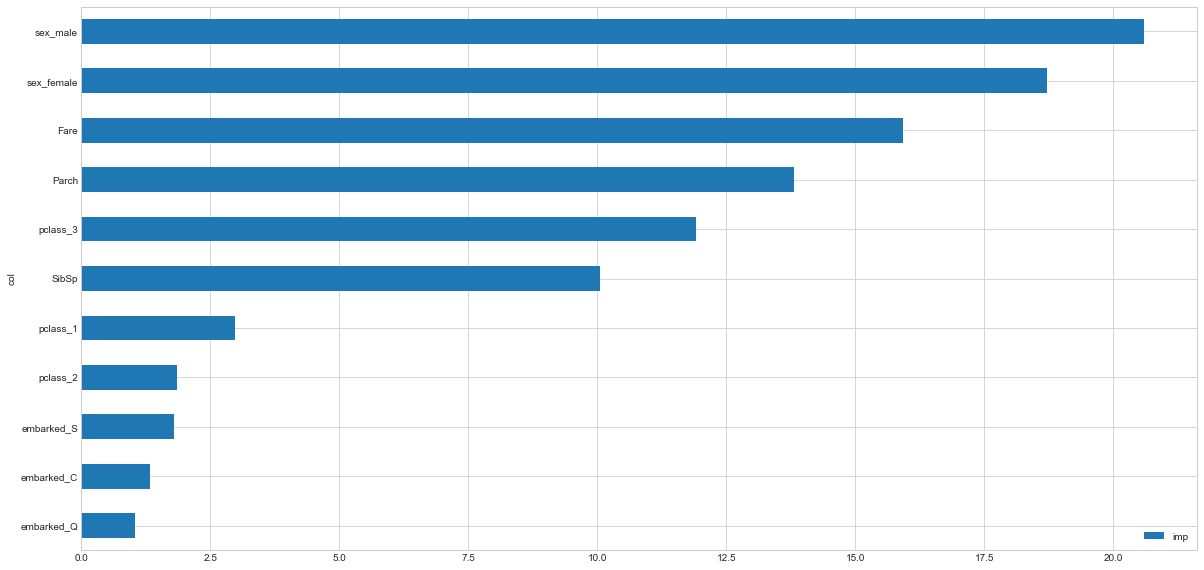

In [135]:
feature_importance(catboost_model, X_train)

In [136]:
metrics = ['Precision', 'Recall', 'F1', 'AUC']

eval_metrics = catboost_model.eval_metrics(train_pool,
                                           metrics=metrics,
                                           plot=True)

for metric in metrics:
    print(str(metric)+": {}".format(np.mean(eval_metrics[metric])))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Precision: 0.832808478096646
Recall: 0.6813264705882354
F1: 0.7494343813705067
AUC: 0.8846831002892961


## Submission

In [137]:
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [138]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [139]:
test_embarked_one_hot = pd.get_dummies(test['Embarked'], 
                                       prefix='embarked')

test_sex_one_hot = pd.get_dummies(test['Sex'], 
                                prefix='sex')

test_plcass_one_hot = pd.get_dummies(test['Pclass'], 
                                   prefix='pclass')

In [140]:
test = pd.concat([test, 
                  test_embarked_one_hot, 
                  test_sex_one_hot, 
                  test_plcass_one_hot], axis=1)

In [141]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1


In [142]:
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['SibSp', 'Parch', 'Fare', 'embarked_C', 'embarked_Q', 'embarked_S',
       'sex_female', 'sex_male', 'pclass_1', 'pclass_2', 'pclass_3'],
      dtype='object')

In [143]:
predictions = catboost_model.predict(test[wanted_test_columns])

In [144]:
predictions[:20]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1],
      dtype=int64)

In [145]:
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [146]:
submission['Survived'] = submission['Survived'].astype(int)
print('Converted Survived column to integers.')

Converted Survived column to integers.


In [147]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [148]:
submission.to_csv('../catboost_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [149]:
submissions_check = pd.read_csv("../catboost_submission.csv")
submissions_check.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
